<a href="https://colab.research.google.com/github/deepinmachine/hotel_booking_analysis/blob/main/Hotel_booking_analysis_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IMPORTING NECESSARY LIBRARIES FOR DATA ANALYSIS


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

MOUNTING GOOGLE DRIVE TO ACCESS DATA


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Data cleaning and data preparations

In [3]:
df=pd.read_csv('/content/drive/MyDrive/datasets/Hotel Bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
#coverting object to date time as i will try to forecast and check seasonality
df['reservation_status_date']=pd.to_datetime(df['reservation_status_date'])

In [7]:
#checking non unique object present in different columns
for col in df.describe(include='object').columns:
  print(col)
  print(df[col].unique())
  print('-'*60)

hotel
['Resort Hotel' 'City Hotel']
------------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
------------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
------------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'C

In [8]:
#checking and cleaning null values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [9]:
#company and agent columns are unneccasry for analysis we can drop them
df.drop(['company','agent'],axis=1,inplace=True)

In [10]:
#finally getting discription of data
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


<Axes: ylabel='adr'>

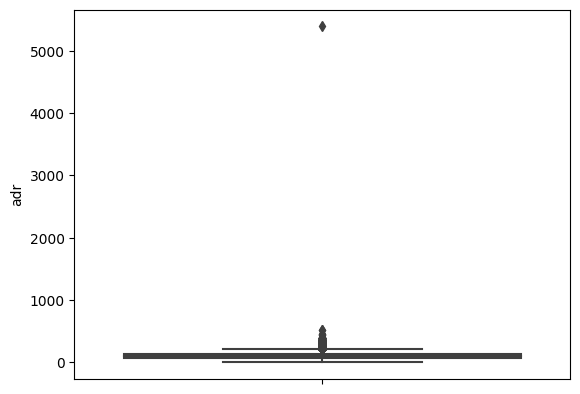

In [11]:
#adr (average dailay rate) seems to have a outlier, checing by box plot
sns.boxplot(y='adr',data=df)

In [12]:
#removing outlier
df=df[df['adr']<4000]
#adr cannot be negative
df=df[df['adr']>0]

DATA VISUALIZATION AND ANALYSIS


<Axes: xlabel='index', ylabel='reservation_status'>

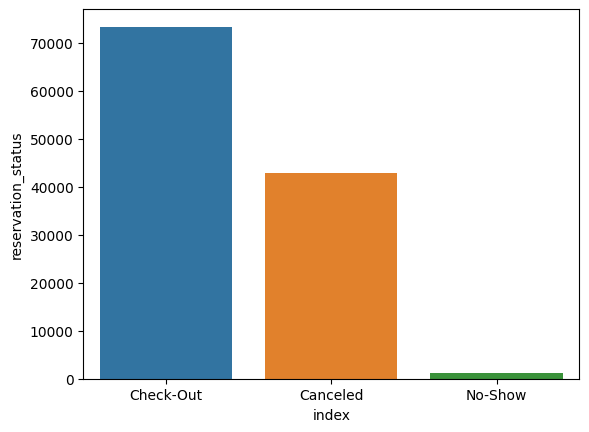

In [13]:
#ratio of cancellation of booking
status=df['reservation_status'].value_counts().reset_index()
sns.barplot(x=status['index'],y=status['reservation_status'],data=status)

<Axes: xlabel='hotel', ylabel='count'>

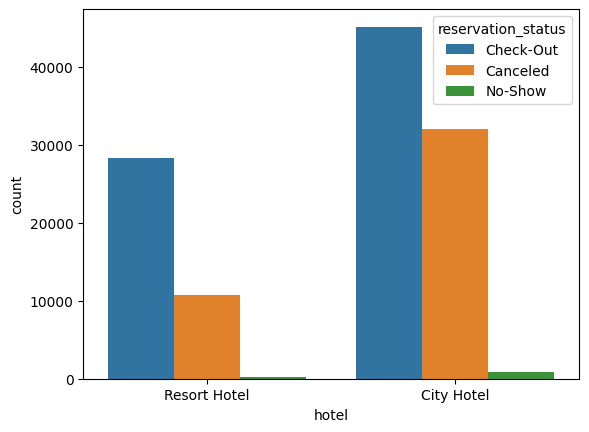

In [14]:
#to check whether hotels or resort are getting more cancelled
sns.countplot(x=df['hotel'],hue=df['reservation_status'])

<Axes: xlabel='reservation_status_date', ylabel='adr'>

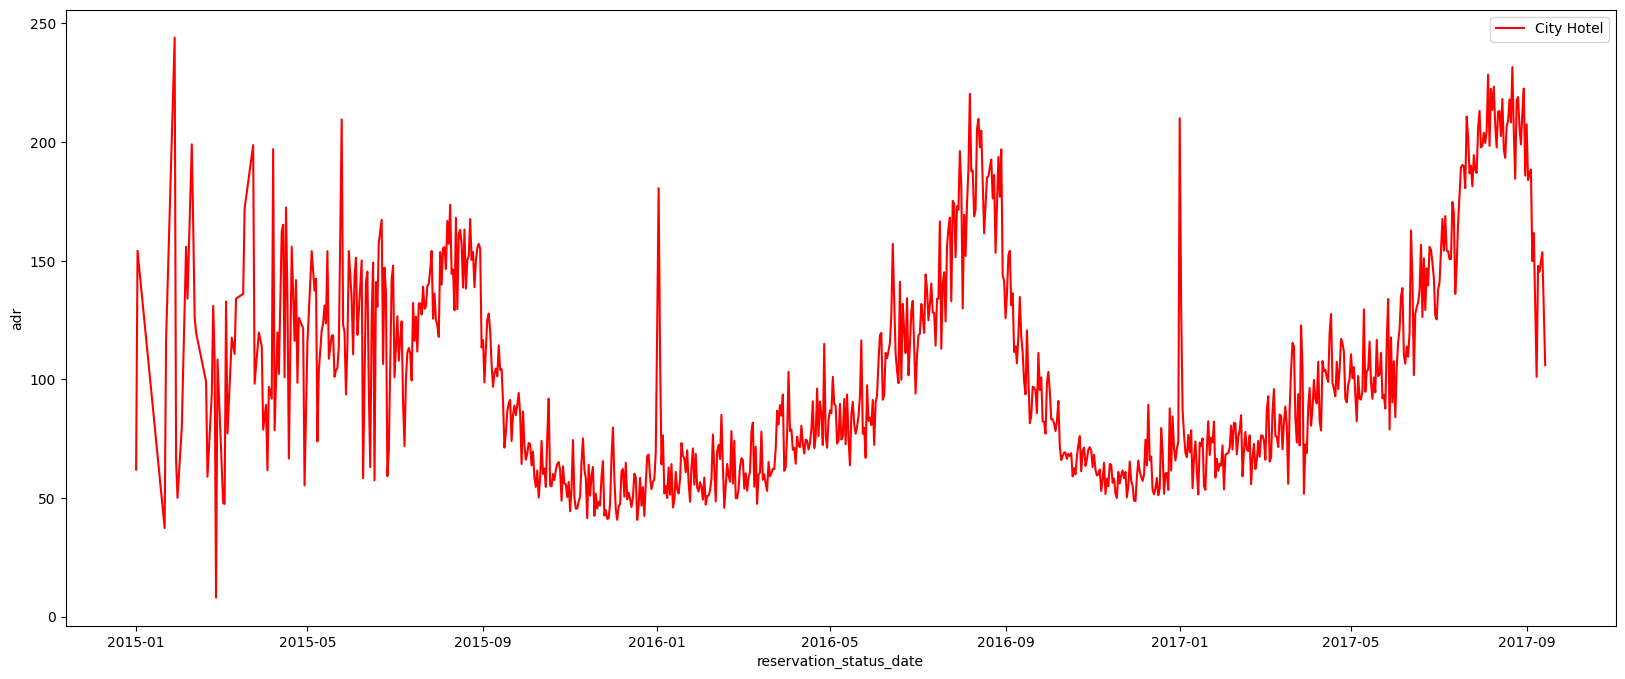

In [15]:
#adr(average day revenue) variation in both resort and hotel monthly
plt.figure(figsize=(20,8))
resort_data=df[df['hotel']=='Resort Hotel'].groupby('reservation_status_date')['adr'].mean().reset_index()
city_hotel_data=df[df['hotel']=='Resort Hotel'].groupby('reservation_status_date')['adr'].mean().reset_index()
sns.lineplot(x=city_hotel_data['reservation_status_date'], y=city_hotel_data['adr'], label='City Hotel',color='red')

<Axes: xlabel='reservation_status_date', ylabel='adr'>

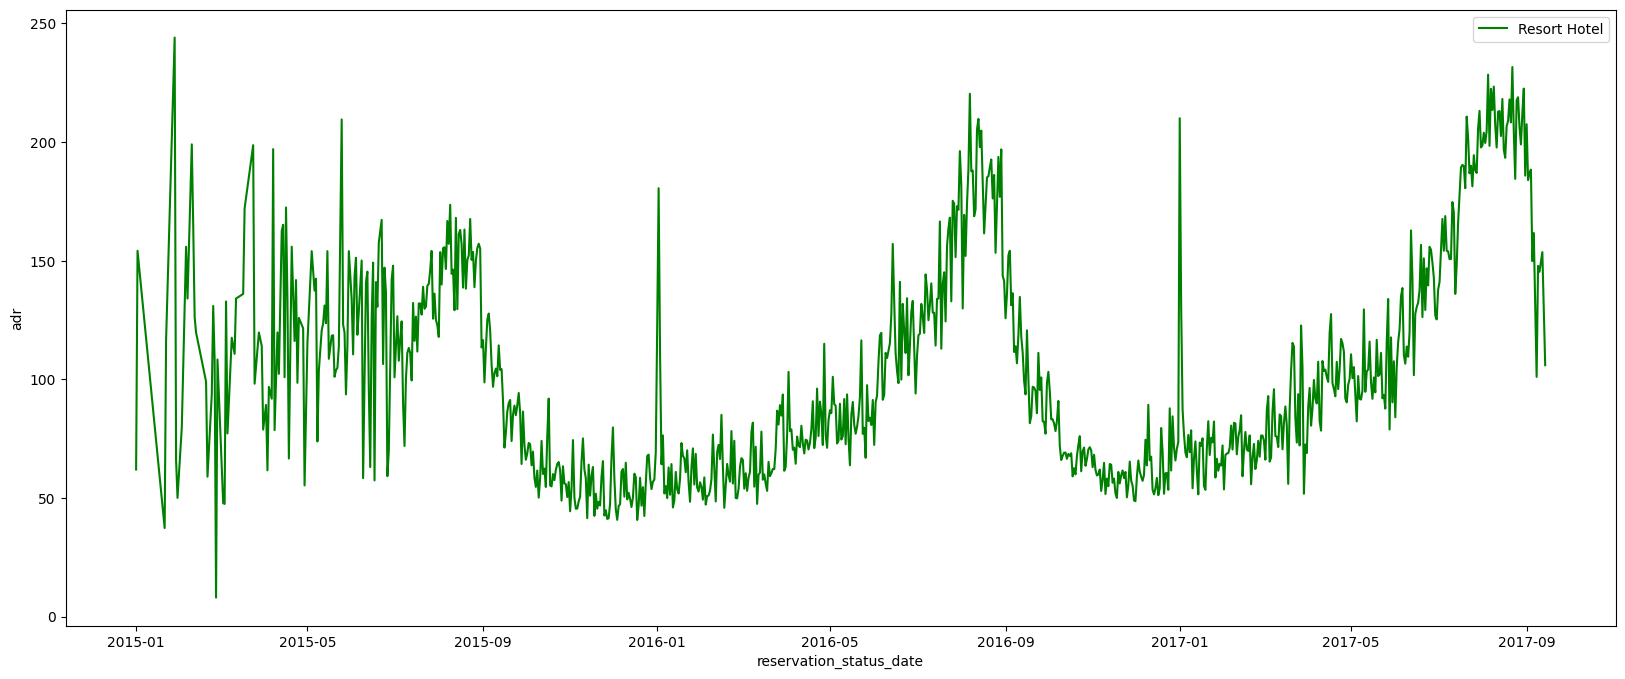

In [16]:
plt.figure(figsize=(20,8))
sns.lineplot(x=resort_data['reservation_status_date'],y= resort_data['adr'], label='Resort Hotel',color='green')

Insight: it is clearly visible that adr peak at 9th months while lowest in jan or 1st month so there must be some campaign done in jan to increase adr

Now to unerstand what are the top 10 countries getting hotel booked


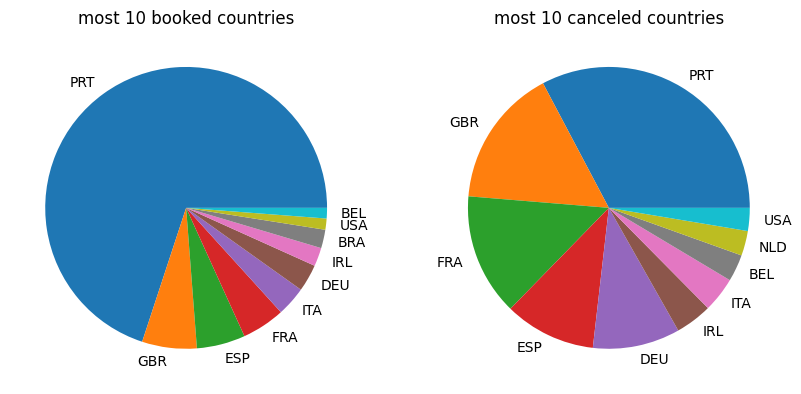

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
top_10_canceled=df[df['is_canceled']==1]
top_10_booked=df[df['is_canceled']==0]
top_10_canceled=top_10_canceled['country'].value_counts()[:10]
top_10_booked=top_10_booked['country'].value_counts()[:10]
ax1.pie(top_10_canceled,labels=top_10_canceled.index)
ax2.pie(top_10_booked,labels=top_10_booked.index)
ax1.set_title('most 10 booked countries')
ax2.set_title('most 10 canceled countries')
plt.show()

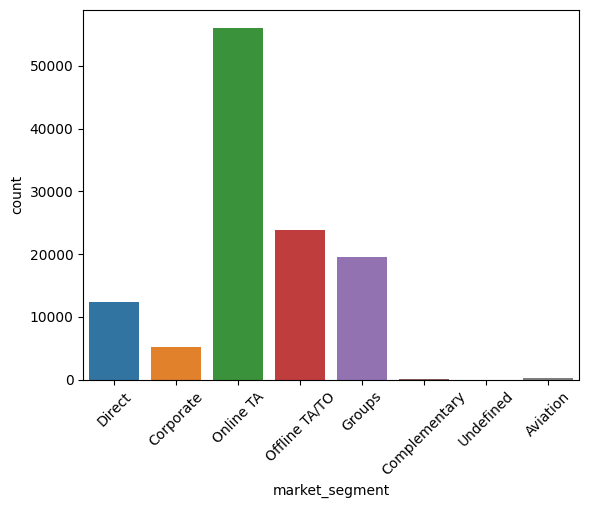

In [18]:
#Analysing market size segment
sns.countplot(x='market_segment',data=df)
plt.xticks(rotation=45)
plt.show()


Online TA market sengement have the biggest share, we will try to analize the growth on this market segment yearly, and also try to analyze yearly margment in other sector also so that we can increase or campaign for increase the decreasing market segment.

<Axes: xlabel='arrival_date_year', ylabel='count'>

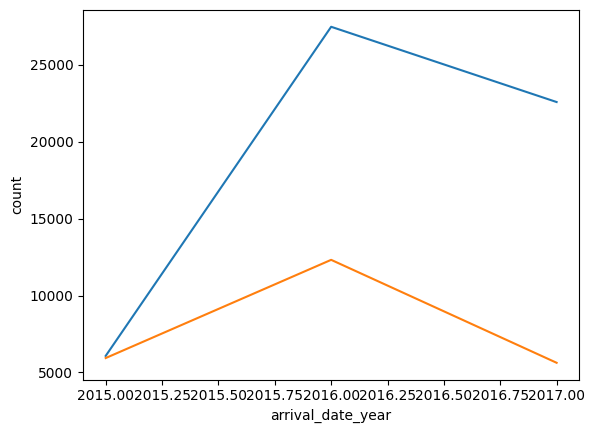

In [19]:
market_segments=df.groupby('arrival_date_year', as_index=False)['market_segment'].value_counts()
Online_TA=market_segments[market_segments['market_segment']=='Online TA']
Ofline_TA=market_segments[market_segments['market_segment']=='Offline TA/TO']
sns.lineplot(x='arrival_date_year',y='count',data=Online_TA)
sns.lineplot(x='arrival_date_year',y='count',data=Ofline_TA)

While both online and offline TA has maximum booking in 2016 and there seems to be a decrease in 2017 and there is boom  in bookings in year 2016 from 2015